<a href="https://colab.research.google.com/github/dhanushba/Data_Science_Assignment/blob/main/EDA/Dhanush_B_A_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


In [ ]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [ ]:
# ------------------------ EDA: Summary Statistics ------------------------
# Summary statistics for each dataset
customers_summary = customers_df.describe(include='all')
products_summary = products_df.describe(include='all')
transactions_summary = transactions_df.describe(include='all')


In [ ]:
# Output summary statistics
print("Customers Dataset Summary:")
print(customers_summary)
print("\nProducts Dataset Summary:")
print(products_summary)
print("\nTransactions Dataset Summary:")
print(transactions_summary)


Customers Dataset Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Products Dataset Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                

In [ ]:
# ------------------------ EDA: Transactions Over Time ------------------------
# Aggregating transactions over time (monthly)
transactions_over_time = transactions_df['TransactionDate'].dt.to_period('M').value_counts().sort_index()


In [ ]:
# Output transactions over time
print("\nTransactions Over Time (Monthly):")
print(transactions_over_time)


Transactions Over Time (Monthly):
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


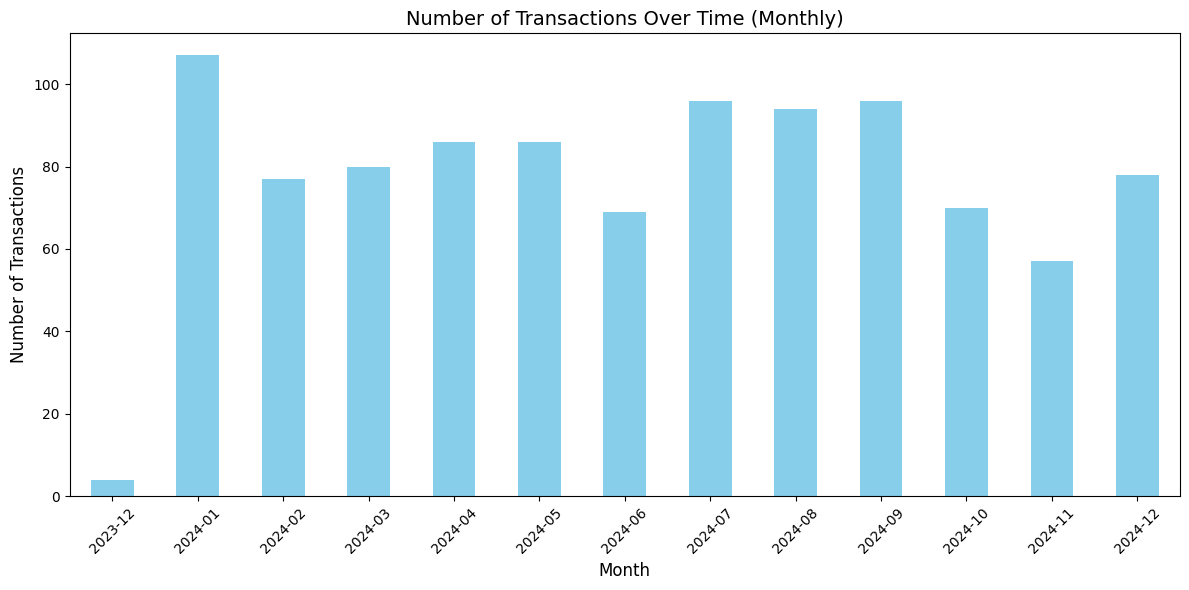

In [ ]:
# ------------------------ Visualization: Transactions Per Month ------------------------
# Plot: Transactions per month
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions Over Time (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ------------------------ EDA: Revenue by Region ------------------------
# Aggregating total revenue by region
transactions_with_customers = transactions_df.merge(customers_df, on='CustomerID')
revenue_by_region = transactions_with_customers.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)


In [ ]:
# Output total revenue by region
print("\nTotal Revenue by Region:")
print(revenue_by_region)



Total Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


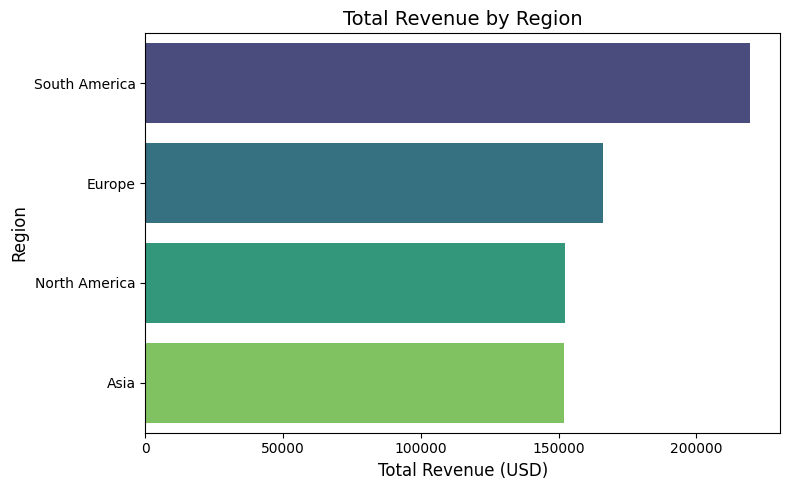

In [ ]:
# ------------------------ Visualization: Revenue by Region ------------------------
# Plot: Revenue by region
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.values, y=revenue_by_region.index, palette="viridis")
plt.title('Total Revenue by Region', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# ------------------------ EDA: Most Popular Product Categories ------------------------
# Aggregating most popular product categories
transactions_with_products = transactions_df.merge(products_df, on='ProductID')
popular_categories = transactions_with_products['Category'].value_counts().head(5)


In [ ]:
# Output most popular categories
print("\nMost Popular Product Categories:")
print(popular_categories)


Most Popular Product Categories:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


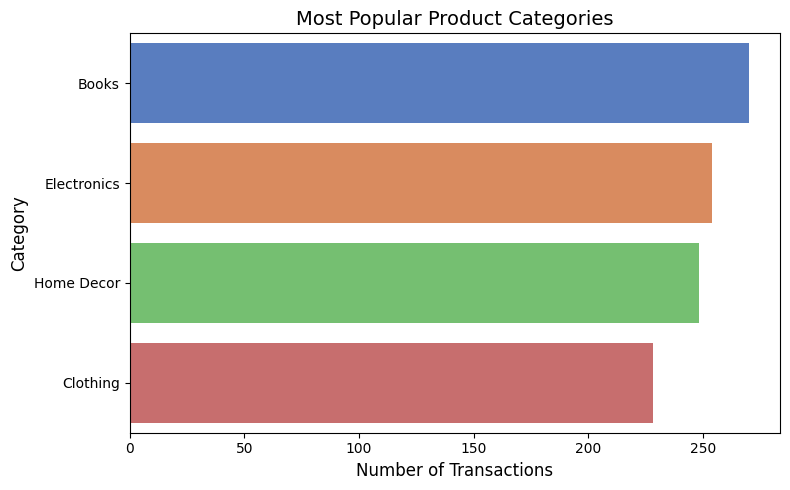

In [ ]:
# ------------------------ Visualization: Popular Categories ------------------------
# Plot: Most popular categories
plt.figure(figsize=(8, 5))
sns.barplot(x=popular_categories.values, y=popular_categories.index, palette="muted")
plt.title('Most Popular Product Categories', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# ------------------------ Return the Aggregated Data ------------------------
# Return summary statistics and aggregated data
(customers_summary, products_summary, transactions_summary, revenue_by_region, popular_categories)

(       CustomerID      CustomerName         Region           SignupDate
 count         200               200            200                  200
 unique        200               200              4                  NaN
 top         C0001  Lawrence Carroll  South America                  NaN
 freq            1                 1             59                  NaN
 mean          NaN               NaN            NaN  2023-07-19 08:31:12
 min           NaN               NaN            NaN  2022-01-22 00:00:00
 25%           NaN               NaN            NaN  2022-09-26 12:00:00
 50%           NaN               NaN            NaN  2023-08-31 12:00:00
 75%           NaN               NaN            NaN  2024-04-12 12:00:00
 max           NaN               NaN            NaN  2024-12-28 00:00:00,
        ProductID            ProductName Category       Price
 count        100                    100      100  100.000000
 unique       100                     66        4         NaN
 top      